In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [14]:
import os

# Set the path to the dataset
dataset_path = r"F:/desktop/ML materials/Lab/projects/Brain Cancer Detection/archive"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, "Training")
test_dir = os.path.join(dataset_path, "Testing")

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [15]:
print("the train dir path ", train_dir)

the train dir path  F:/desktop/ML materials/Lab/projects/Brain Cancer Detection/archive\Training


In [16]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

In [21]:
print("train_data ", train_data)

train_data  [                 Image Category  Count
0     Tr-glTr_0000.jpg   glioma   1321
1     Tr-glTr_0001.jpg   glioma   1321
2     Tr-glTr_0002.jpg   glioma   1321
3     Tr-glTr_0003.jpg   glioma   1321
4     Tr-glTr_0004.jpg   glioma   1321
...                ...      ...    ...
1316    Tr-gl_1316.jpg   glioma   1321
1317    Tr-gl_1317.jpg   glioma   1321
1318    Tr-gl_1318.jpg   glioma   1321
1319    Tr-gl_1319.jpg   glioma   1321
1320    Tr-gl_1320.jpg   glioma   1321

[1321 rows x 3 columns],                  Image    Category  Count
0     Tr-meTr_0000.jpg  meningioma   1339
1     Tr-meTr_0001.jpg  meningioma   1339
2     Tr-meTr_0002.jpg  meningioma   1339
3     Tr-meTr_0003.jpg  meningioma   1339
4     Tr-meTr_0004.jpg  meningioma   1339
...                ...         ...    ...
1334    Tr-me_1334.jpg  meningioma   1339
1335    Tr-me_1335.jpg  meningioma   1339
1336    Tr-me_1336.jpg  meningioma   1339
1337    Tr-me_1337.jpg  meningioma   1339
1338    Tr-me_1338.jpg  meningi

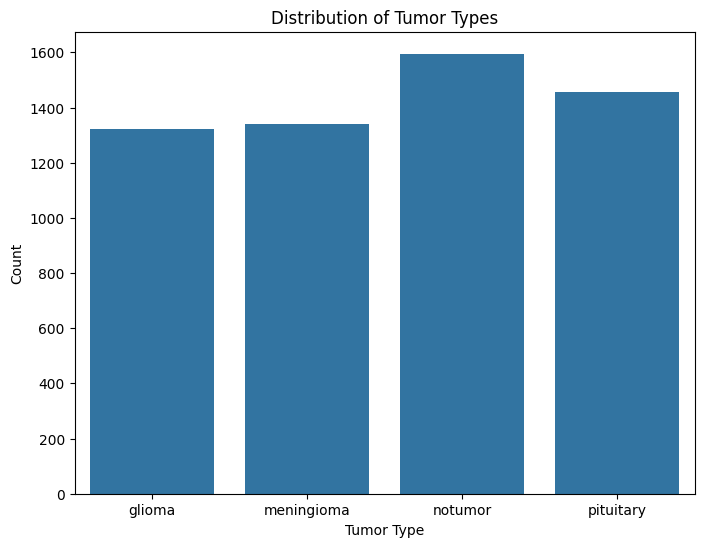

In [17]:
# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

In [22]:
# Set the image size
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

In [23]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [26]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50
178/178 [==============================] - 47s 239ms/step - loss: 0.9845 - accuracy: 0.5592 - val_loss: 0.9104 - val_accuracy: 0.6273
Epoch 2/50
178/178 [==============================] - 17s 97ms/step - loss: 0.7054 - accuracy: 0.7173 - val_loss: 1.7855 - val_accuracy: 0.5031
Epoch 3/50
178/178 [==============================] - 17s 94ms/step - loss: 0.6302 - accuracy: 0.7537 - val_loss: 0.7131 - val_accuracy: 0.7250
Epoch 4/50
178/178 [==============================] - 17s 94ms/step - loss: 0.5746 - accuracy: 0.7718 - val_loss: 0.7989 - val_accuracy: 0.6773
Epoch 5/50
178/178 [==============================] - 17s 94ms/step - loss: 0.5034 - accuracy: 0.8093 - val_loss: 0.4462 - val_accuracy: 0.8148
Epoch 6/50
178/178 [==============================] - 17s 94ms/step - loss: 0.4521 - accuracy: 0.8292 - val_loss: 0.5920 - val_accuracy: 0.7617
Epoch 7/50
178/178 [==============================] - 17s 94ms/step - loss: 0.4295 - accuracy: 0.8408 - val_loss: 0.8253 - val_accuracy

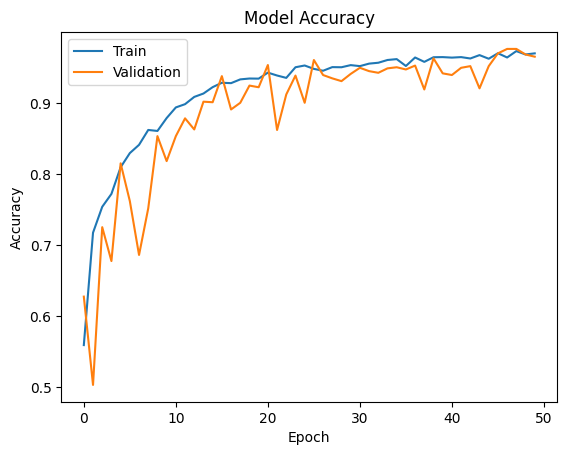

In [28]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

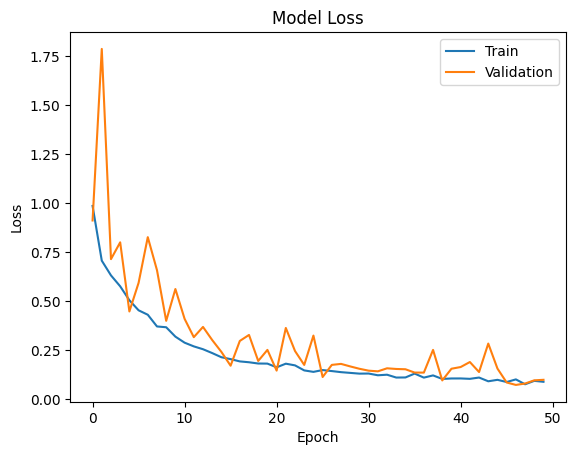

In [29]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 [==============================] - 1s 28ms/step - loss: 0.0975 - accuracy: 0.9648
Test Loss: 0.09752432256937027
Test Accuracy: 0.96484375


In [31]:
# Save the trained model
model.save("brain_tumor_detection_model.h5")